In [28]:
import sys
sys.path = ["/Users/jklinger/Nesta/jklearn/"] + sys.path

from matplotlib import pyplot as plt
import sklearn.cluster
import sklearn.datasets
import hdbscan
import fastcluster
import time
from jklearn.cluster.omnislash_opt import Omnislash
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import os
from collections import defaultdict

import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

# Performance vs dimensionality

-- HDBSCAN 100
HDBSCAN 2
Omnislash 12
sklearn DBSCAN 8
sklearn Kmeans 12


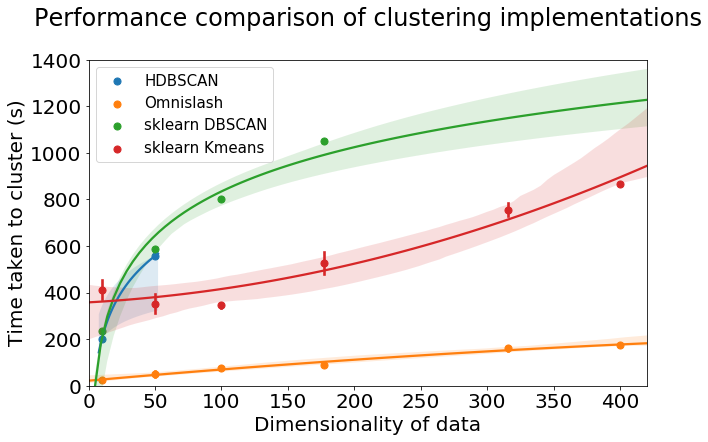

In [68]:
results = defaultdict(list)
for filename in os.listdir("outputs"):
    if not filename.endswith(".out"):
        continue
    field, dim, _, _, _ = filename.split("_")    
    dim = int(dim.split("-")[1])
    try:
        time_taken = float(open("outputs/"+filename).read())
    except ValueError:
        print("--", field, dim)
        continue
    results[field].append(dict(dim=dim, time_taken=time_taken))

fig, ax = plt.subplots(figsize=(10, 6))
    
for field, data in results.items():
    print(field, len(data))
    df = pd.DataFrame(data)
    sns.regplot(x='dim', y='time_taken', data=df, ax=ax,
                label=field, x_estimator=np.mean, logx = len(data)/2 <= 4, order= 1 if len(data)/2 <= 4 else 2)

ax.set_xlim(0, 420)
ax.set_ylim(0, 1400)
ax.set_xlabel('Dimensionality of data')
ax.set_ylabel('Time taken to cluster (s)')
ax.set_title('Performance comparison of clustering implementations\n')
ax.legend(fontsize=15)

# Performance vs dataset size

In [ ]:
# Note Kmeans 1e7 out of memory

# Performance vs target cluster size

In [97]:
data = []
r = requests.get("http://cs.joensuu.fi/sipu/datasets/s2.txt")
for line in r.text.split("\n"):
    if line.strip() == "":
        continue
    x, y = line.strip().split()
    data.append({"x":float(x), "y":float(y)})
df = pd.DataFrame(data)
data = df.as_matrix()

results = []
for n in list(np.linspace(10,24,1)) + list(np.linspace(25, 500, 25)):
    for i in range(0, 5):
        omni = Omnislash(n, evr_max=0.75, sample_space_size=1000, n_components_max=2)
        start_time = time.time()
        labels = omni.fit_predict(data)
        time_taken = time.time() - start_time
        results.append(dict(n=n, time_taken=time_taken, n_found=len(set(labels))))

/Users/jklinger/anaconda3/envs/py36-jklearn/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Number of\nclusters found\n')

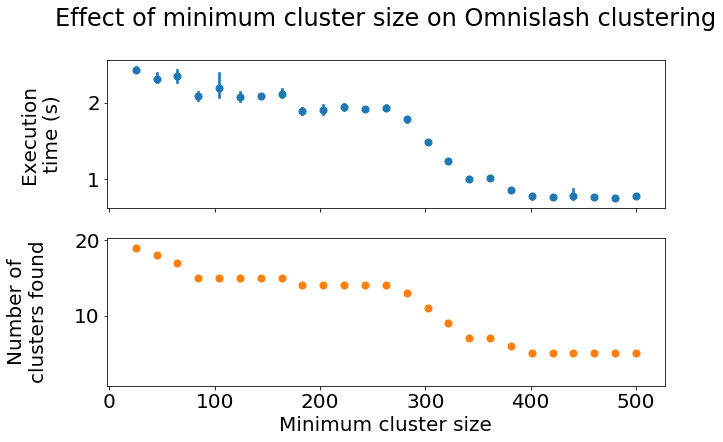

In [99]:
df = pd.DataFrame(results)
df = df[df.n >= 25]
fig, (ax, ax2) = plt.subplots(2, figsize=(10, 6), sharex=True)
sns.regplot(x='n', y='time_taken', data=df, ax=ax,
                x_estimator=np.mean, fit_reg=False)

ax.set_xlabel("")
ax.set_ylabel("Execution\ntime (s)\n")
ax.set_title("Effect of minimum cluster size on Omnislash clustering\n")

sns.regplot(x='n', y='n_found', data=df, ax=ax2,
                x_estimator=np.mean, fit_reg=False)

ax2.set_xlabel("Minimum cluster size")
ax2.set_ylabel("Number of\nclusters found\n")